## <h3 align="center"> **Classificar a VOICED através de WaveNet**</h3> 

# Importando os pacotes

In [ ]:
import tensorflow as tf

In [ ]:
# from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import pandas as pd

In [ ]:
import numpy
from sklearn import metrics

In [ ]:
import librosa.display as dsp
import librosa

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
import soundfile as sf

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --quiet wfdb 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 KB 5.0 MB/s eta 0:00:00


In [ ]:
import wfdb

#Carregando os dados
O nosso classificador será construído para resolver um problema de classificação binária: saudáveis vs patológicas. Para isso, nós utilizaremos a base de dados VOICED.


In [ ]:
base_dir = "/content/drive/MyDrive/VOICED"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


train_saudavels_dir = os.path.join(train_dir, 'saudavel')  # diretório com as imagens de treinamento da classe saudavel
train_patologicos_dir = os.path.join(train_dir, 'patologico')  # diretório com as imagens de treinamento da classe patologico 
validation_saudavels_dir = os.path.join(validation_dir, 'saudavel')  # diretório com as imagens de validação da classe saudavel 
validation_patologicos_dir = os.path.join(validation_dir, 'patologico')  # diretório com as imagens de validação da classe patologico

##Analisando o número de dados

In [ ]:
num_saudavels_tr = len(os.listdir(train_saudavels_dir))//5
num_patologicos_tr = len(os.listdir(train_patologicos_dir))//5

num_saudavels_val = len(os.listdir(validation_saudavels_dir))//5
num_patologicos_val = len(os.listdir(validation_patologicos_dir))//5

total_train = num_saudavels_tr + num_patologicos_tr
total_val = num_saudavels_val + num_patologicos_val
total_total = total_train + total_val

print('total de "imagens" de saudavels na base de treino:', num_saudavels_tr)
print('total de "imagens" de patologicos na base de treino:', num_patologicos_tr)

print('total de "imagens" de saudavels na base de validação:', num_saudavels_val)
print('total de "imagens" de patologicos na base de validacao:', num_patologicos_val)
print("--")
print("Total de 'imagens' de treino:", total_train)
print("Total de 'imagens' de validação:", total_val)
print("Total de 'imagens':", total_total)

total de "imagens" de saudavels na base de treino: 35
total de "imagens" de patologicos na base de treino: 110
total de "imagens" de saudavels na base de validação: 21
total de "imagens" de patologicos na base de validacao: 42
--
Total de 'imagens' de treino: 145
Total de 'imagens' de validação: 63
Total de 'imagens': 208


##Ajustando os dados


só ta aqui porque ainda é necessario usar certos conjuntos de dados

In [ ]:
l_train_saudaveis = sorted(list(set([x[0:8] for x in os.listdir(train_saudavels_dir)])))
#l_train_saudaveis

In [ ]:
l_sinais_train_saudaveis = []

for file in l_train_saudaveis:
  record = wfdb.rdrecord('/content/drive/MyDrive/VOICED/train/saudavel/'+ file) 
  l_sinais_train_saudaveis.append(record.__dict__['p_signal'])

In [ ]:
l_validation_saudaveis = sorted(list(set([x[0:8] for x in os.listdir(validation_saudavels_dir)])))
#l_validation_saudaveis

In [ ]:
l_sinais_validation_saudaveis = []

for file in l_validation_saudaveis:
  record = wfdb.rdrecord('/content/drive/MyDrive/VOICED/validation/saudavel/'+ file) 
  l_sinais_validation_saudaveis.append(record.__dict__['p_signal'])

In [ ]:
l_validation_patologico = sorted(list(set([x[0:8] for x in os.listdir(validation_patologicos_dir)])))
#l_validation_saudaveis

In [ ]:
l_sinais_validation_patologico = []

for file in l_validation_patologico:
  record = wfdb.rdrecord('/content/drive/MyDrive/VOICED/validation/patologico/'+ file) 
  l_sinais_validation_patologico.append(record.__dict__['p_signal'])

In [ ]:
l_train_patologico = sorted(list(set([x[0:8] for x in os.listdir(train_patologicos_dir)])))
#l_train_patologico

In [ ]:
l_sinais_train_patologico = []

for file in l_train_patologico:
  record = wfdb.rdrecord('/content/drive/MyDrive/VOICED/train/patologico/'+ file) 
  l_sinais_train_patologico.append(record.__dict__['p_signal'])

In [ ]:
lista_train = l_sinais_train_saudaveis + l_sinais_train_patologico

In [ ]:
lista_validation = l_sinais_validation_saudaveis + l_sinais_validation_patologico

In [ ]:
y_train = []
i=0
while i< 35*700:
  y_train.append(0)
  i+= 1

In [ ]:
i=0
while i< 110*700:
  y_train.append(1)
  i+= 1

In [ ]:
y_validation = []
i=0
while i< 21*700:
  y_validation.append(0)
  i+= 1

In [ ]:
i=0
while i< 42*700:
  y_validation.append(1)
  i+= 1

In [ ]:
len(y_train)

101500

In [ ]:
len(y_validation)

44100

In [ ]:
array_train = np.array(lista_train)
array_y_train = np.array(y_train)
array_validation = np.array(lista_validation)
array_y_validation = np.array(y_validation)

<ipython-input-35-f242ca103e8c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array_train = np.array(lista_train)
<ipython-input-35-f242ca103e8c>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array_validation = np.array(lista_validation)


In [ ]:
array_y_train = array_y_train.reshape(-1, 1)
array_y_train.shape

(101500, 1)

In [ ]:
array_y_validation = array_y_validation.reshape(-1, 1)
array_y_validation.shape

(44100, 1)

In [ ]:
array_validation_reshape = np.zeros((63,37625))
for i,v in enumerate(array_validation):
  array_validation_reshape[i,:] = array_validation[i][:].T[0,:37625]

In [ ]:
teste_num2 = array_validation_reshape.copy()

In [ ]:
lista_validation_nova = []

for m_lista in teste_num2:
  zim = m_lista[1750:]
  lista_validation_nova.append(zim)


In [ ]:
lista_validation_nova[62].shape

(35875,)

In [ ]:
array_validation_reshape.shape

(63, 37625)

In [ ]:
array_train_reshape = np.zeros((145,37625))
for i,v in enumerate(array_train):
  array_train_reshape[i,:] = array_train[i][:].T[0,:37625]

In [ ]:
array_train_reshape.shape

(145, 37625)

In [ ]:
teste_num3 = array_train_reshape.copy()

In [ ]:
lista_train_nova = []

for m_lista in teste_num3:
  zim = m_lista[1750:]
  lista_train_nova.append(zim)


In [ ]:
lista_train_nova[62].shape

(35875,)

##janelando as series temporais

In [ ]:
array_train_reshape.shape

(145, 37625)

mudar pelo "array_train_reshape" 

In [ ]:
cont1 = 0
cont2 = 0
janelamento = 875 #janela de tamanho 875
step = 50        #
lista_segmentos = []


start = 0
end = janelamento

while cont1< len(lista_train_nova):
  while end< len(lista_train_nova[cont1]):
      
      lista_segmentos.append(lista_train_nova[cont1][start:end])
      # lista_aux.append(lista_segmentos)
      
      start+=step
      end+=step
      cont2+=1
  cont1+=1
  print(cont2)
  cont2=0
  start,end = 0,janelamento

In [ ]:
array_segmentos_train = np.array(lista_segmentos)
array_segmentos_train.shape

(101500, 875)

In [ ]:
len(lista_segmentos)

101500

mudar pelo array_validation_reshape

In [ ]:
cont1 = 0
# cont2 = 0
janelamento = 875 #janela de tamanho 875
step = 50        #
lista_segmentos_validation = []


start = 0
end = janelamento

while cont1< len(lista_validation_nova):
  while end< len(lista_validation_nova[cont1]):
      
      lista_segmentos_validation.append(lista_validation_nova[cont1][start:end])
      # lista_aux.append(lista_segmentos)
      
      start+=step
      end+=step
      # cont2+=1
  cont1+=1
  start,end = 0,janelamento

In [ ]:
array_segmentos_validation = np.array(lista_segmentos_validation)
array_segmentos_validation.shape

(44100, 875)

In [ ]:
len(lista_segmentos_validation)

44100

#REDE PRE TREINADA


In [ ]:
model_pa = "/content/drive/MyDrive/Colab Notebooks/wavenet_pre_treined.h5"

In [ ]:
model_A = tf.keras.models.load_model(model_pa)

In [ ]:
dir(model_A)

In [ ]:
model_pre_train = tf.keras.models.Model(inputs=model_A.input, outputs=model_A.layers[-3].output)

In [ ]:
x = tf.keras.layers.Dense(1, activation = 'sigmoid')(model_pre_train.output)    #saida igual a 1
model_pre_train = tf.keras.models.Model(inputs=model_pre_train.input, outputs=x)

In [ ]:
for i in model_pre_train.layers[:-2]:
  # print(i)
  i.trainable = False

In [ ]:
#model_pre_train.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_pre_train.compile(loss='binary_crossentropy', optimizer=opt,  metrics = ['accuracy'])

In [ ]:
def build_model(summary=False):

  model = models.Sequential()
  model.add(layers.Conv1D(32, 5, activation='relu', input_shape = (825, 1)))
  model.add(layers.MaxPool1D())
  model.add(layers.Conv1D(64, 5, activation='relu')) # 64 feature maps
  model.add(layers.MaxPool1D())
  model.add(layers.Flatten())
  model.add(layers.Dense(100, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))


  if summary:
    model.summary()

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

  return model

model = build_model(summary=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 821, 32)           192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 410, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 406, 64)           10304     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 203, 64)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 12992)             0         
                                                                 
 dense_1 (Dense)             (None, 100)               1

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_val, X_test, y_val, y_test = train_test_split(array_segmentos_validation, array_y_validation, random_state=42, test_size = 0.5)

In [ ]:
history = model_pre_train.fit(array_segmentos_train,
                    array_y_train,
                    epochs = 1,  
                    batch_size = 32,
                    validation_data =[array_segmentos_validation,array_y_validation],
                    # validation_data =[X_val,y_val],
                    callbacks=[model_checkpoint_callback])

3172/3172 [==============================] - 1165s 363ms/step - loss: 22.7875 - accuracy: 0.7500 - val_loss: 22.8882 - val_accuracy: 0.6652


In [ ]:
for i in model_pre_train.layers[:-2]:
  # print(i)
  i.trainable = True

In [ ]:
history = model_pre_train.fit(array_segmentos_train,
                    array_y_train,
                    epochs = 1,  
                    batch_size = 32,
                    validation_data =[array_segmentos_validation,array_y_validation],
                    callbacks=[model_checkpoint_callback])

3172/3172 [==============================] - 1138s 359ms/step - loss: 22.7643 - accuracy: 0.7584 - val_loss: 22.8818 - val_accuracy: 0.6637


##Matriz de Confusão

In [ ]:
def print_acc(Y_df_test, predict):

  accuracy = accuracy_score(Y_df_test, predict)
  # precision = precision_score(Y_df_test, predict)
  # recall = recall_score(Y_df_test, predict)
  # f1 = f1_score(Y_df_test, predict)
  matrix = confusion_matrix(Y_df_test, predict)

  print('accuracy', accuracy)
  # print('precision', precision)
  # print('recall', recall)
  # print('f1', f1)
  print('confusion matrix', matrix)

In [ ]:
print_acc(array_y_validation,y_pred)

ValueError: ignored

In [ ]:
y_pred = model_pre_train.predict(X_test)

690/690 [==============================] - 172s 247ms/step


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(y_true, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

NameError: ignored

In [ ]:
actual = (array_y_train)

confusion_matrix = metrics.confusion_matrix(actual, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

ValueError: ignored

In [ ]:
acc=accuracy_score(array_y_train, y_pred)
print(f"accuracy: {acc}")

cm=confusion_matrix(array_y_train, y_pred,labels=[0,1])
print("Confusion Matrix:")
print(cm)

accuracy: 0.2413793103448276
Confusion Matrix:
[[1505    0]
 [4730    0]]


#FIM DA REDE PRE TREINADA

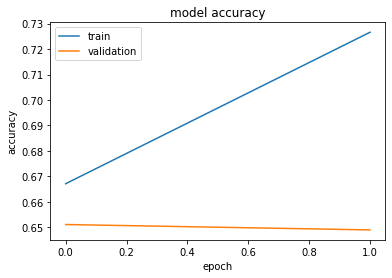

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

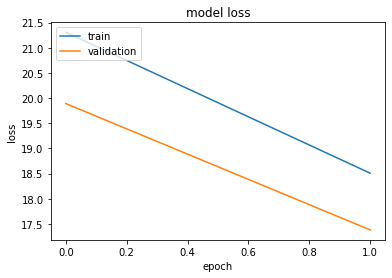

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()